In [1]:
%matplotlib inline
from preamble import *
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split


## K-Means Clustering

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


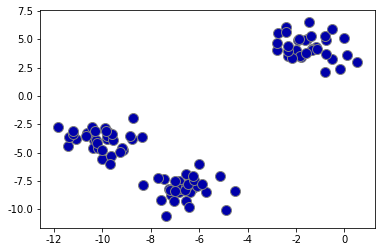

In [9]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

#인위적으로 2차원 데이터를 생성합니다
X, y = make_blobs(random_state = 1)
mglearn.discrete_scatter(X[:,0],X[:,1],markers='o') #데이터를 넣으면 뿌려줌

In [12]:
# r군집 모델을 만듭니다.
kmeans = KMeans(n_clusters = 3) #임의로 라벨 설정 , 지도학습의 라벨과 다름
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
print(kmeans.labels_)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [17]:
print(kmeans.predict(X))
#print(kmeans.predit([[-10,-5]]))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


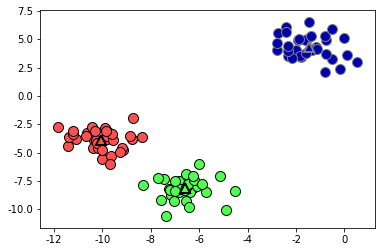

In [19]:
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth = 2)

## K-Means Clustering 실패

Text(0, 0.5, 'feature 1')

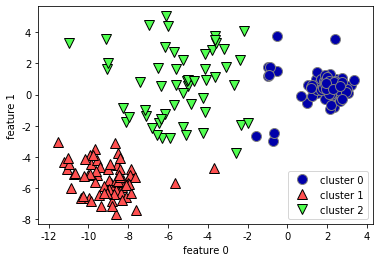

In [20]:
X_varied,y_varied = make_blobs(n_samples = 200, cluster_std =[1.0,2.5,0.5],
                              random_state = 170)
y_pred = KMeans(n_clusters=3,random_state = 0).fit_predict(X_varied)

mglearn.discrete_scatter(X_varied[:,0],X_varied[:,1],y_pred)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc = 'best')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# 실패한 이유
# 데이터 분산이 커서 많이 퍼져있어서 클러스트링 쉽지 않음

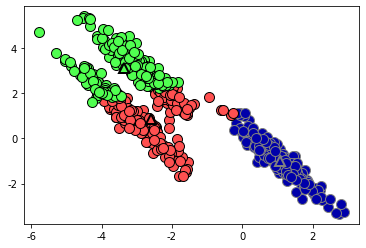

In [23]:
# 무작위로 클러스터 데이터 생성
X,y = make_blobs(random_state = 170,n_samples=600)
rng = np.random.RandomState(74)

#데아터가 길게 늘어지도록 변경합니다
transformation = rng.normal(size = (2,2))
X = np.dot(X, transformation)

# 중요!
# 세 개의 클러스터  로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

#클러스터 할당과 클러스터 중심을 나타냅니다
mglearn.discrete_scatter(X[:,0],X[:,1],kmeans.labels_,markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],[0,1,2],markers='^',markeredgewidth = 2)

#제대로 클러스터링 되지않음 길게 있는 것은 kmeans로 잘 되지않는다

# Agglomerative Clustering

Text(0, 0.5, 'feature 1')

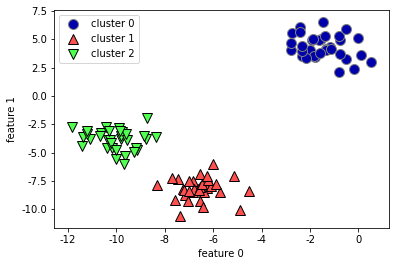

In [25]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state = 1)

agg = AgglomerativeClustering(n_clusters = 3)
assignment = agg.fit_predict(X)

mglearn.discrete_scatter(X[:,0],X[:,1],assignment)
plt.legend(["cluster 0","cluster 1","cluster 2"],loc = "best")
plt.xlabel("feature 0")
plt.ylabel("feature 1")

# DESCAN Clustering

In [26]:
from sklearn.cluster import DBSCAN
X,y = make_blobs(random_state = 0, n_samples =12)

dbscan = DBSCAN()
#dbscan = DBSCAN(min_samples = min_samples,eps = eps)
clusters = dbscan.fit_predict(X)
print("클러스터 레이블:\n",clusters)

클러스터 레이블:
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


min_samples: 2 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  클러스터: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  클러스터: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  클러스터: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  클러스터: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  클러스터: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  클러스터: [0 0 0 0 0 0 0 0 0 0 0 0]


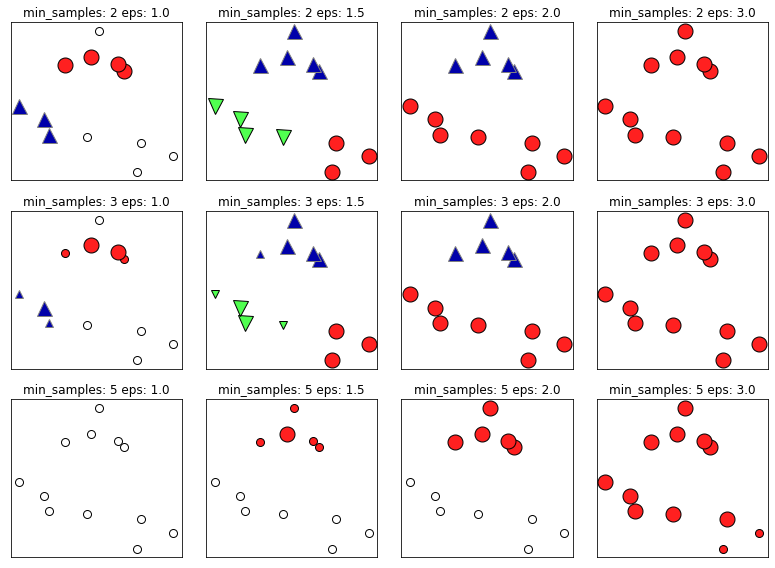

In [28]:
mglearn.plots.plot_dbscan()
# min_samples이 늘어날수록 노이즈 늘어남 eps가 늘어날수록 하나로 합쳐짐

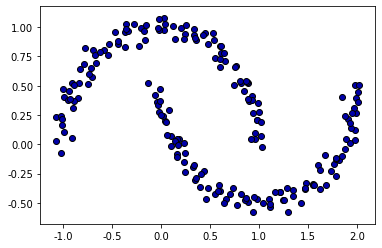

In [29]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples = 200,noise = 0.05,random_state = 0)
plt.scatter(X[:,0],X[:,1],edgecolors='black')

Text(0, 0.5, 'feature 1')

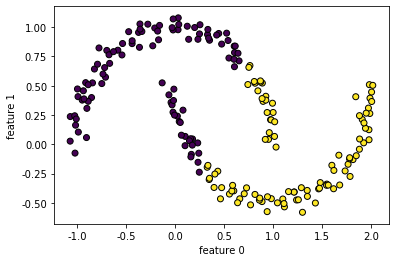

In [31]:
# 두개의 클러스터로 데이터에 KMeans 알고리즘을 적용합니다
kmeans = KMeans(n_clusters = 2)
y_pred = kmeans.fit_predict(X)

#클러스터 할당과 클러스터 중심을 표시합니다
plt.scatter(X[:,0],X[:,1],c=y_pred, edgecolors = 'k')
plt.xlabel("feature 0")
plt.ylabel("feature 1")

Text(0, 0.5, 'feature 1')

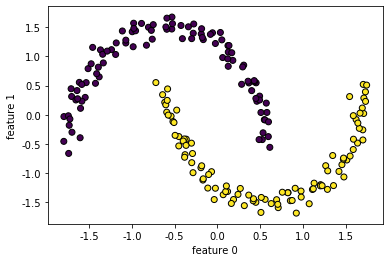

In [32]:
# 평균이 0 분산이 1이 되도록 데이터의 스케일을 조정
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

#클러스터 할당을 표시합니다
plt.scatter(X_scaled[:,0],X_scaled[:,1],c = clusters,edgecolors = 'black')
plt.xlabel("feature 0")
plt.ylabel("feature 1")